<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/EDA%20PCA%20ICA%20t-SNE%20DBSCAN%20AggClustering%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA, FastICA, KernelPCA


# Generate Data

Пусть
Y
0
,
Y
1
,
…
,
Y
n
 — независимые стандартные нормальные случайные величины, такие что
Y
i
∼
N
(
0
,
1
)
,
i
=
1
…
n
. Тогда распределение случайной величины
t
выглядит так и называется t-распределением с n-степенями свободы.

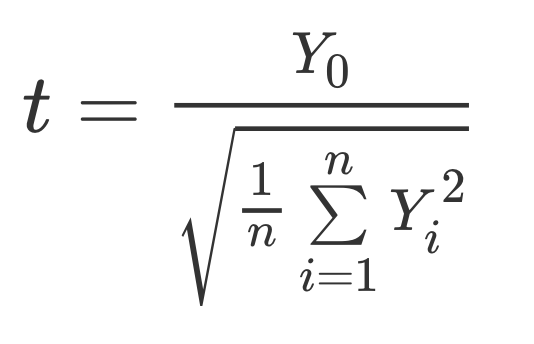

In [69]:
import matplotlib.pyplot as plt


def plot_samples(S, axis_list=None, color="steelblue"):

    colors = ['red' if label == 0 else 'blue' for label in color]
    plt.scatter(
        #S[:, 0], S[:, 1], s=2, marker="o", zorder=10, c=color#, color=color, alpha=0.5
         S[:, 0], S[:, 1], alpha=0.4, s=30, edgecolors='k', linewidth=0.5, c=colors
    )
    if axis_list is not None:
        for axis, color, label in axis_list:
            x_axis, y_axis = axis / axis.std()
            plt.quiver(
                (0, 0),
                (0, 0),
                x_axis,
                y_axis,
                zorder=11,
                width=0.01,
                scale=6,
                color=color,
                label=label,
            )

    plt.hlines(0, -5, 5, color="black", linewidth=0.5)
    plt.vlines(0, -3, 3, color="black", linewidth=0.5)
    plt.xlim(-5, 5)
    plt.ylim(-3, 3)
    plt.gca().set_aspect("equal")
    plt.xlabel("x")
    plt.ylabel("y")


def plot_df_samples(df, axis_list=None, color="steelblue"):

    S1 = np.array(df['Column1'])
    S2 = np.array(df['Column2'])
    S1 = S1/S1.std()
    S2 = S2/S2.std()
    color = np.array(df['Column3'])
    colors = ['red' if label == 0 else 'blue' for label in color]

    plt.scatter(
        #S[:, 0], S[:, 1], s=2, marker="o", zorder=10, c=color#, color=color, alpha=0.5
         S1, S2, alpha=0.4, s=30, edgecolors='k', linewidth=0.5, c=colors
    )
    if axis_list is not None:
        for axis, color, label in axis_list:
            x_axis, y_axis = axis / axis.std()
            plt.quiver(
                (0, 0),
                (0, 0),
                x_axis,
                y_axis,
                zorder=11,
                width=0.01,
                scale=6,
                color=color,
                label=label,
            )

    plt.hlines(0, -5, 5, color="black", linewidth=0.5)
    plt.vlines(0, -3, 3, color="black", linewidth=0.5)
    plt.xlim(-5, 5)
    plt.ylim(-3, 3)
    plt.gca().set_aspect("equal")
    plt.xlabel("x")
    plt.ylabel("y")

## dataset #1 - ortho for PCA

In [3]:
# пересекающиеся множества

import random
n_samples = 500

Ya = np.random.uniform(-3, -2, n_samples)
Xa = np.random.uniform(-1,1,n_samples)
Ca = np.zeros(n_samples)
A = np.hstack((Xa,Ya))

Yb = np.random.uniform(-1, 1, n_samples)
Xb = np.random.uniform(-6,6,n_samples)
Cb = np.ones(n_samples)
B = np.hstack((Xb,Yb))

X = np.vstack((A,B))
Cy = np.hstack((Ca,Cb))

# original data
X = X.T

# Mix data
Rotation = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

## dataset #2 - nonortho for ICA

In [29]:
# пересекающиеся множества

import random
n_samples = 500

Ya = np.random.uniform(-3, 3, n_samples)
Xa = np.random.uniform(-1,1,n_samples)
Ca = np.zeros(n_samples)
A = np.hstack((Xa,Ya))

Yb = np.random.uniform(-1, 1, n_samples)
Xb = np.random.uniform(-6,6,n_samples)
Cb = np.ones(n_samples)
B = np.hstack((Xb,Yb))

X = np.vstack((A,B))
Cy = np.hstack((Ca,Cb))

# original data
X = X.T

# Mix data
Rotation = np.array([[13, 1], [-1, 2]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

## dataset #3 - gaussian for ICA

In [81]:
# пересекающиеся множества

import random
n_samples = 500

Ya = np.random.normal(0, 3, n_samples)
Xa = np.random.uniform(-1,1,n_samples)
Ca = np.zeros(n_samples)
#A = np.hstack((Xa,Ya))
A = np.vstack((Xa,Ya))

Yb = np.random.normal(0, 1, n_samples)
Xb = np.random.uniform(-6,6,n_samples)
Cb = np.ones(n_samples)
#B = np.hstack((Xb,Yb))
B = np.vstack((Xb,Yb))

#X = np.vstack((A,B))
X = np.hstack((A,B))
Cy = np.hstack((Ca,Cb))
#Cy = np.vstack((Ca,Cb))

# original data
X = X.T

# Mix data
Rotation = np.array([[1, 1], [-1, 2]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

## dataset #3 - dimention reduction - working

In [6]:
# пересекающиеся множества

import random
n_samples = 500

Ya = np.random.normal(-3, 3, n_samples)
Xa = np.random.uniform(-1,1,n_samples)
Ca = np.zeros(n_samples)
A = np.hstack((Xa,Ya))

Yb = np.random.normal(3, 3, n_samples)
Xb = np.random.uniform(-6,6,n_samples)
Cb = np.ones(n_samples)
B = np.hstack((Xb,Yb))

Yc = np.random.normal(4, 1, n_samples)
Xc = np.random.uniform(6,10,n_samples)
Cc = np.ones(n_samples)
C = np.hstack((Xc,Yc))

Yd = np.random.normal(-5, 1, n_samples)
Xd = np.random.uniform(-4,-6,n_samples)
Cd = np.ones(n_samples)
D = np.hstack((Xd,Yd))

X = np.vstack((A,B,C,D))
Cy = np.hstack((Ca,Cb,Cc,Cd))

# original data
X = X.T

#X = X.reshape(-1,2)
#Cy = Cy.reshape(-1,2)

# Mix data
Rotation = np.array([[1, 1, 1, 1], [-1, 1, 1, -1]])  # Mixing matrix
#Rotation = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

## dataset#4 - t-destribution

In [7]:
# T-destribution
n_samples = 10000

rng = np.random.RandomState(42)
X = rng.standard_t(1.5, size=(n_samples, 2))
X[:, 0] *= 2.0

Cb = np.ones(int(n_samples/2))
Ca = np.zeros(int(n_samples/2))
Cy = np.hstack((Ca,Cb))
# Mix data
Rotation = np.array([[0.5, 1], [1, 1]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

# PCA + Kernel PCA

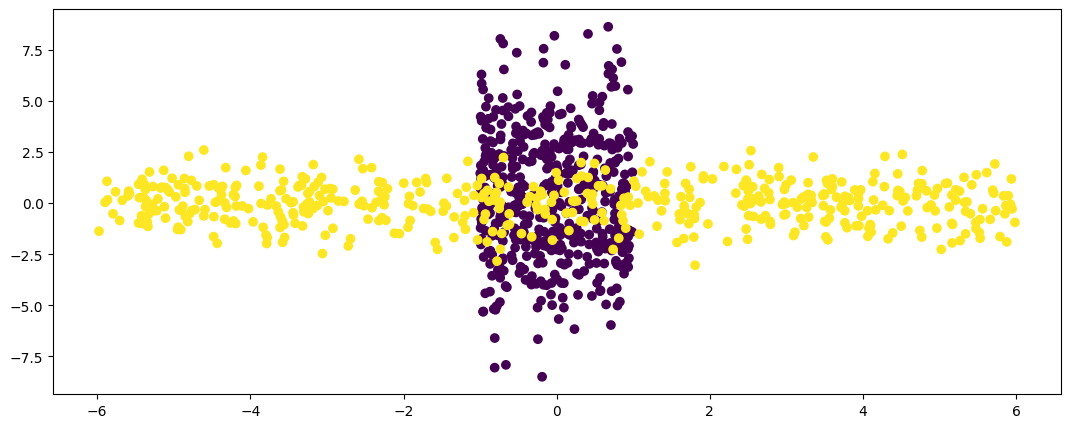

In [82]:
plt.scatter(X[:, 0], X[:, 1],c=Cy)

In [84]:
# Create a dictionary where keys are column names and values are the arrays
data = {'Column1': X[:,0], 'Column2': X[:,1], 'Column3': Cy}

# Create the DataFrame
df = pd.DataFrame(data)

In [85]:
df.head(10)

,Column1,Column2,Column3
0,0.110116,-1.361248,0.0
1,-0.381344,4.274908,0.0
2,0.428236,-2.971644,0.0
3,0.757001,0.173914,0.0
4,-0.330395,-3.982523,0.0
5,-0.089104,4.434228,0.0
6,0.128216,-0.490163,0.0
7,0.524240,-2.234713,0.0
8,-0.516549,5.329541,0.0
9,0.791917,-3.021857,0.0


In [86]:
# Shuffle the rows
df_shuffled = df.sample(frac=1)
print("\nShuffled DataFrame (original index retained):")
print(df_shuffled)


Shuffled DataFrame (original index retained):
      Column1   Column2  Column3
609  2.995529  0.903638      1.0
626  2.034012  1.190593      1.0
69  -0.243778 -2.947673      0.0
2    0.428236 -2.971644      0.0
963  0.810600 -1.710007      1.0
..        ...       ...      ...
180 -0.698943  7.827247      0.0
11  -0.924031  4.733954      0.0
901 -5.422470 -0.609184      1.0
466 -0.869349 -2.970071      0.0
370  0.716973 -2.311925      0.0

[1000 rows x 3 columns]


In [87]:
df_shuffled.head(10)

,Column1,Column2,Column3
609,2.995529,0.903638,1.0
626,2.034012,1.190593,1.0
69,-0.243778,-2.947673,0.0
2,0.428236,-2.971644,0.0
963,0.810600,-1.710007,1.0
677,0.736845,-2.261700,1.0
12,0.699421,1.973063,0.0
302,0.476546,1.488758,0.0
99,-0.980203,4.040132,0.0
391,-0.190686,-8.499897,0.0


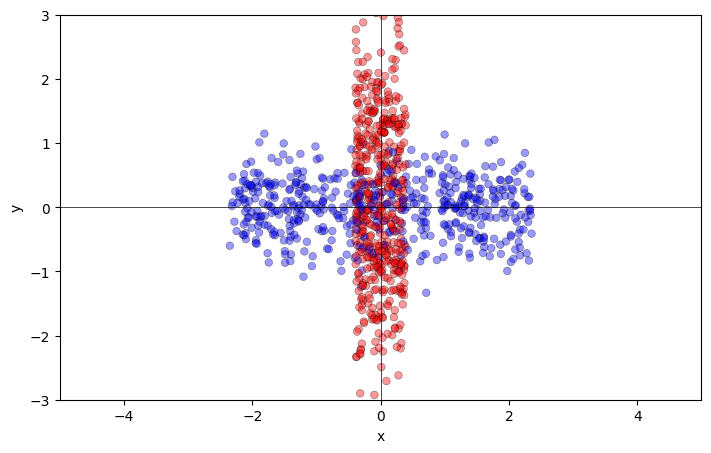

In [88]:
plot_df_samples(df_shuffled)

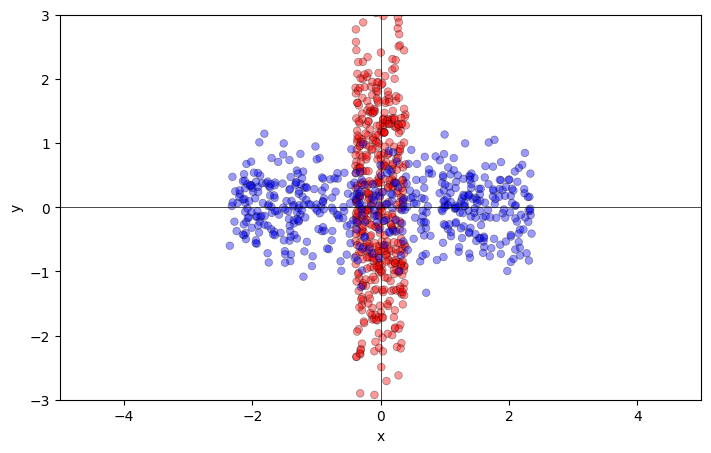

In [89]:
plot_df_samples(df)

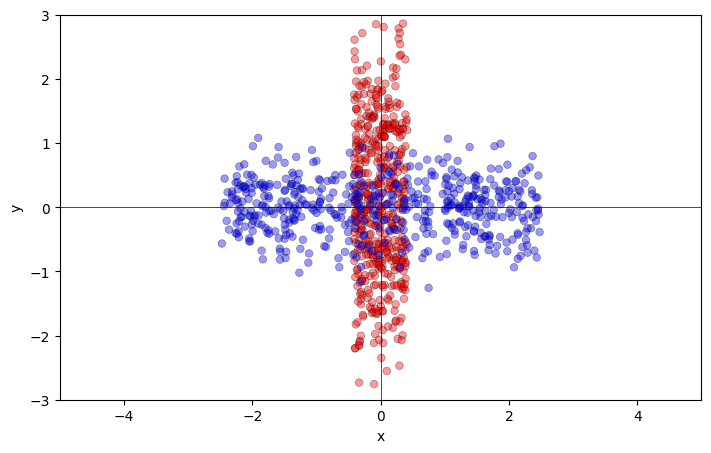

In [90]:
plot_samples(X / X.std(), color = Cy)

Text(0.5, 1.0, 'Observations')

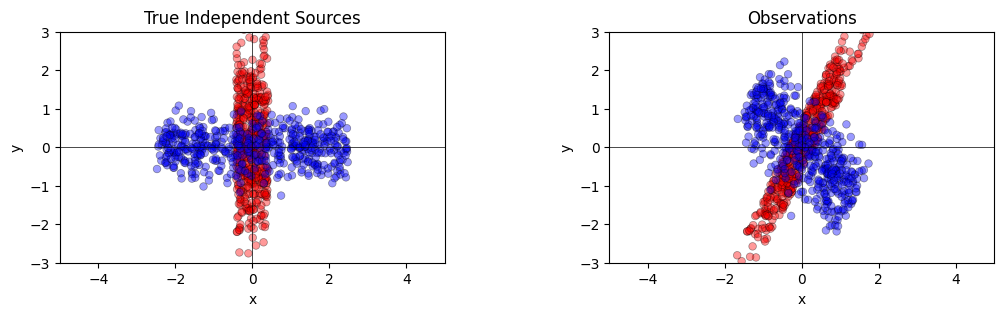

In [91]:
plt.rcParams["figure.figsize"] = (13,3)

plt.subplot(1, 2, 1)
plot_samples(X / X.std(), color=Cy)
plt.title("True Independent Sources")

plt.subplot(1, 2, 2)
plot_samples(Xmixed/ np.std(Xmixed), color=Cy)
plt.title("Observations")




In [92]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xmixed)
print(pca.explained_variance_ratio_)

[0.72652498 0.27347502]


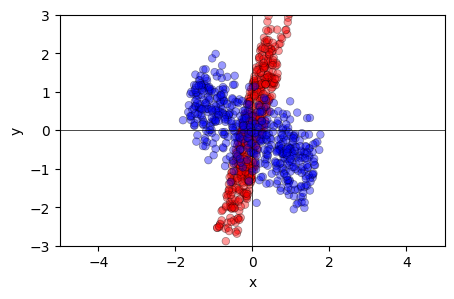

In [93]:
X_pca = np.fliplr(X_pca)
plot_samples(X_pca / X_pca.std(), color = Cy)

Text(0.5, 1.0, 'PCA components done')

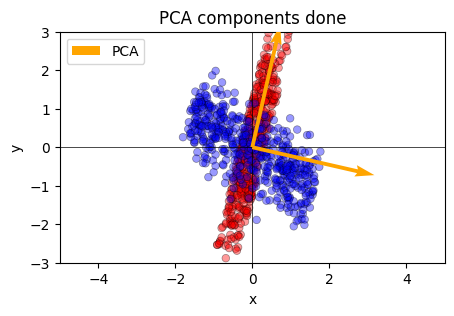

In [94]:
axis_list = [(pca.components_.T, "orange", "PCA")]
plot_samples(X_pca / np.std(X_pca), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("PCA components done")

In [16]:
from scipy.stats import shapiro  #Shapiro test for non-gaussian measure
#it was published in 1965 by Samuel Sanford Shapiro and Martin Wilk

stat, p = shapiro(Xmixed)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.995, p=0.000
Sample does not look Gaussian (reject H0)


In [17]:
from scipy.stats import kstest  # It is named after Andrey Kolmogorov and Nikolai Smirnov.

kstest(X, "norm", alternative='less')

KstestResult(statistic=array([0.09647916, 0.16083307]), pvalue=array([7.44664418e-09, 2.28627442e-23]), statistic_location=array([1.90299138, 1.87834591]), statistic_sign=array([-1., -1.]))

In [18]:
#kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’

kernel_pca = KernelPCA(
    n_components=2, kernel="linear", fit_inverse_transform=True, alpha=0.1
)

X_kernel_pca = kernel_pca.fit(Xmixed).transform(Xmixed)

Text(0.5, 1.0, 'Kernel PCA components done')

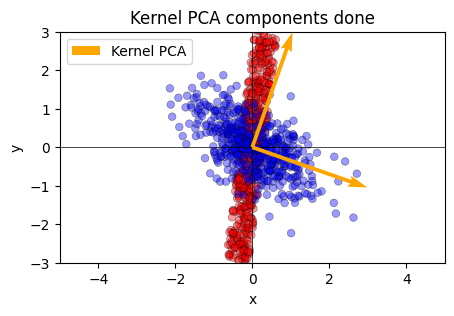

In [19]:
axis_list = [(pca.components_.T, "orange", "Kernel PCA")]
X_kernel_pca = np.fliplr(X_kernel_pca)
plot_samples(X_kernel_pca / np.std(X_kernel_pca), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("Kernel PCA components done")

# ICA

In [20]:
#ica = FastICA(n_components=2, random_state=123, whiten="arbitrary-variance")
ica = FastICA(n_components=2, whiten="arbitrary-variance")

#X_ica = ica.fit(Xmixed).transform(Xmixed)  # Estimate the sources
X_ica = ica.fit_transform(Xmixed)  # Estimate the sources

Text(0.5, 1.0, 'ICA components done')

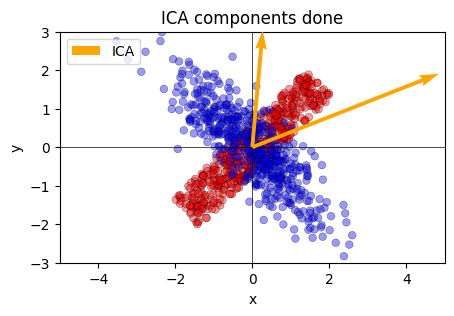

In [21]:
axis_list = [(ica.mixing_.T, "orange", "ICA")]
X_ica = np.fliplr(X_ica)
plot_samples(X_ica / np.std(X_ica), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("ICA components done")

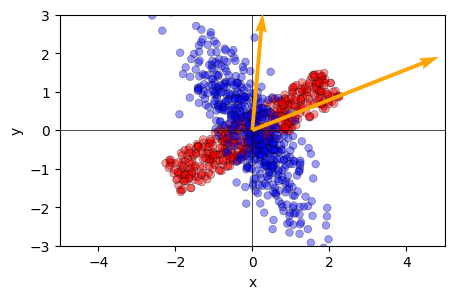

In [22]:
X_ica_pca = pca.fit_transform(X_ica)
X_ica_pca = np.fliplr(X_ica_pca)

plot_samples(X_ica_pca / np.std(X_ica_pca), axis_list=axis_list, color=Cy)

# Compare PCA and ICA

Text(0.5, 1.0, 'Observations')

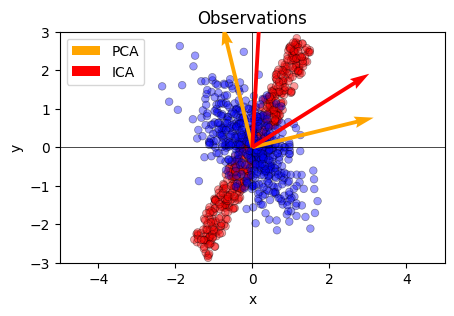

In [23]:
plt.rcParams["figure.figsize"] = (13,3)

axis_list = [(pca.components_.T, "orange", "PCA"), (ica.mixing_, "red", "ICA")]
plot_samples(Xmixed / np.std(Xmixed), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("Observations")

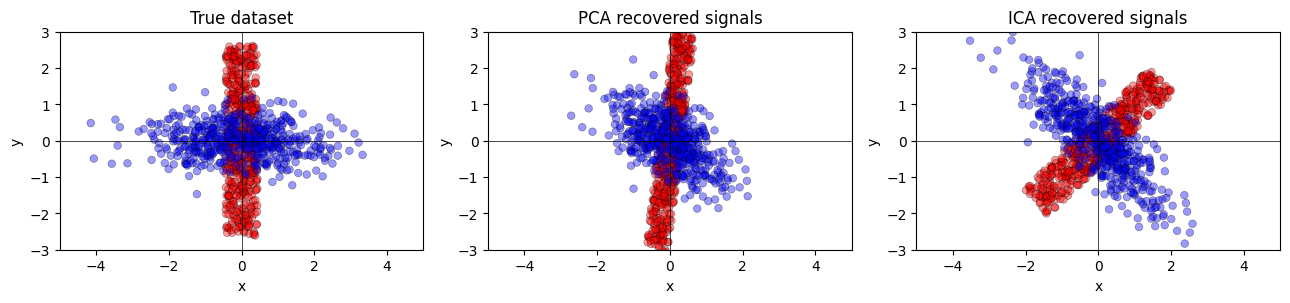

In [24]:
plt.rcParams["figure.figsize"] = (13,5)


plt.subplot(1, 3, 1)
plot_samples(X / X.std(),color=Cy)
plt.title("True dataset")


plt.subplot(1, 3, 2)
plot_samples(X_pca/ np.std(X_pca), color=Cy)
plt.title("PCA recovered signals")


plt.subplot(1, 3, 3)
plot_samples(X_ica / np.std(X_ica), color=Cy)
plt.title("ICA recovered signals")

plt.tight_layout()
plt.show()

# t-SNE

In [116]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter

from sklearn import datasets, manifold

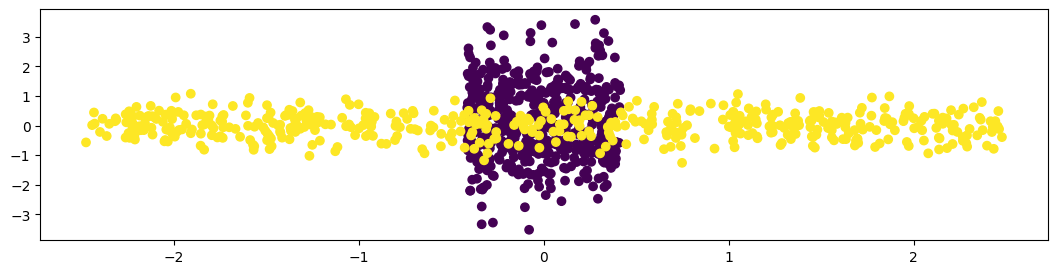

In [117]:
plt.scatter(X[:, 0], X[:, 1], c=Cy)

(np.float64(-2.7219547985145214),
 np.float64(2.7248731258410324),
 np.float64(-3.8735247621449163),
 np.float64(3.933719412902002))

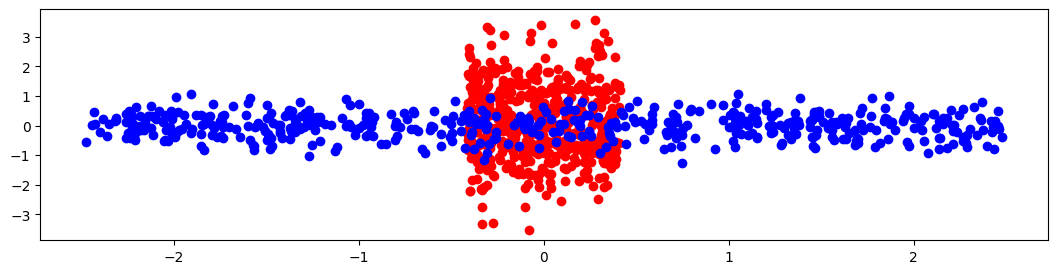

In [118]:
plt.rcParams["figure.figsize"] = (13,3)

red = Cy == 0
blue = Cy == 1

plt.scatter(X[red, 0], X[red, 1], c="r")
plt.scatter(X[blue, 0], X[blue, 1], c="b")
#ax.xaxis.set_major_formatter(NullFormatter())
#ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")


In [119]:
n_components = 2
#perplexities = [1, 5, 10, 15, 20, 30, 40, 50, 100]
perplexities = [30]

(fig, subplots) = plt.subplots(1, len(perplexities)+1, figsize=(17, 3))

red = Cy == 0
blue = Cy == 1

X = X/np.std(X)

ax = subplots[0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[blue, 0], X[blue, 1], c="b")
#ax.xaxis.set_major_formatter(NullFormatter())
#ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        max_iter=300,
    )
    Y = tsne.fit_transform(X/np.std(X))
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r", alpha=0.3)
    ax.scatter(Y[blue, 0], Y[blue, 1], c="b", alpha=0.3)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


circles, perplexity=30 in 3.2 sec


# DBSCAN

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:


# --- Apply DBSCAN ---
# You will need to tune eps and min_samples for your specific data.
# These parameters significantly affect the results.
# Try different combinations to find clusters that match your intuition or domain knowledge.
# Start with default or heuristic-based guesses.
eps_value = 0.27       # Radius of neighborhood
min_samples_value = 5 # Minimum number of points in eps-neighborhood

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
cluster_labels_dbscan = dbscan.fit_predict(X_scaled) # Use scaled data

# Number of clusters (excluding noise if present, labeled as -1)
n_clusters_ = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)
# Number of noise points
n_noise_ = list(cluster_labels_dbscan).count(-1)

print(f"DBSCAN Parameters Used: eps={eps_value}, min_samples={min_samples_value}")
print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")


DBSCAN Parameters Used: eps=0.27, min_samples=5
Estimated number of clusters: 3
Estimated number of noise points: 105


In [36]:

        Cy = np.array(Cy)

        # Adjust labels for metrics if necessary (e.g., if DBSCAN finds more/fewer groups)
        # Metrics like ARI and AMI handle different numbers of clusters well.
        # Avoid NMI if cluster numbers differ significantly or contain many singletons.

        # Adjust labels so noise (-1) gets its own category for evaluation if needed,
        # but usually, we compare found clusters vs true labels directly.
        # For simplicity here, we compare as-is. Noise points (-1) will contribute to dissimilarity.

        # --- Metrics ---
        # Rand Index and Adjusted Rand Index
        ri_score = metrics.rand_score(Cy, cluster_labels_dbscan)
        ari_score = metrics.adjusted_rand_score(Cy, cluster_labels_dbscan)

        # Normalized Mutual Information (can be less reliable if cluster numbers vary much)
        nmi_score = metrics.normalized_mutual_info_score(Cy, cluster_labels_dbscan)

        # Homogeneity, Completeness, V-measure
        homogeneity = metrics.homogeneity_score(Cy, cluster_labels_dbscan)
        completeness = metrics.completeness_score(Cy, cluster_labels_dbscan)
        v_measure = metrics.v_measure_score(Cy, cluster_labels_dbscan)

        # Adjusted Mutual Information
        ami_score = metrics.adjusted_mutual_info_score(Cy, cluster_labels_dbscan)

        print("\n--- Clustering Evaluation Metrics (compared to known labels) ---")
        print(f"Rand Index (RI): {ri_score:.4f}")
        print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
        print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")
        print(f"Homogeneity: {homogeneity:.4f}")
        print(f"Completeness: {completeness:.4f}")
        print(f"V-measure: {v_measure:.4f}")
        print(f"Adjusted Mutual Information (AMI): {ami_score:.4f}")

        # --- Silhouette Score (requires at least 2 clusters and not all noise) ---
        if n_clusters_ >= 2 and n_noise_ < len(X_scaled):
            # Calculate silhouette score only for core samples to avoid issues with noise
            core_samples_mask = np.zeros_like(cluster_labels_dbscan, dtype=bool)
            core_samples_mask[dbscan.core_sample_indices_] = True
            core_cluster_labels = cluster_labels_dbscan[core_samples_mask]

            if len(np.unique(core_cluster_labels)) > 1: # Check unique labels in core samples
                 silhouette_avg = metrics.silhouette_score(X_scaled[core_samples_mask], core_cluster_labels)
                 print(f"Average Silhouette Score (Core Samples): {silhouette_avg:.4f}")
            else:
                 print("Silhouette Score: Not calculable (insufficient unique core cluster labels)")

        else:
             print("Silhouette Score: Not calculated (insufficient clusters or too much noise)")





--- Clustering Evaluation Metrics (compared to known labels) ---
Rand Index (RI): 0.5000
Adjusted Rand Index (ARI): 0.0000
Normalized Mutual Information (NMI): 0.0019
Homogeneity: 0.0011
Completeness: 0.0094
V-measure: 0.0019
Adjusted Mutual Information (AMI): 0.0015
Average Silhouette Score (Core Samples): 0.8281


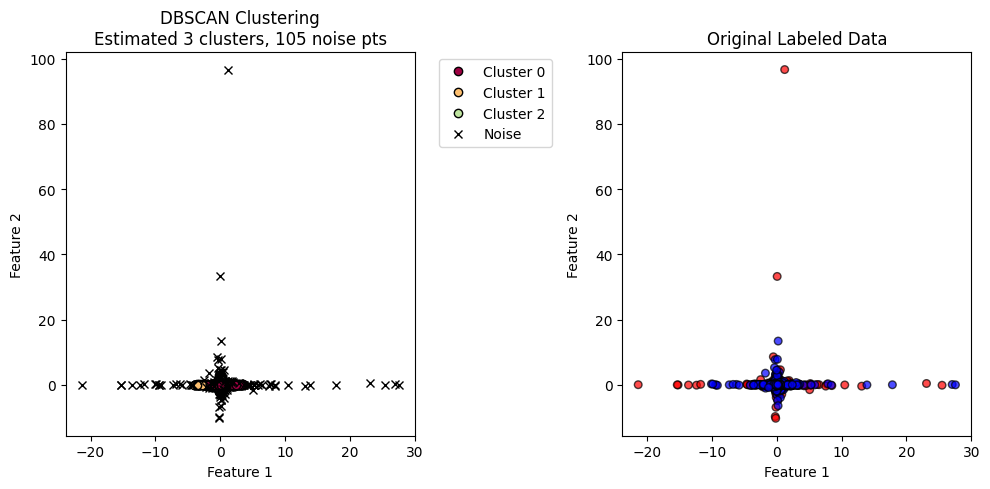

In [37]:

# --- Visualization ---
# Determine unique labels found by DBSCAN (including -1 for noise)
unique_labels_dbscan = set(cluster_labels_dbscan)
n_clusters_found = len(unique_labels_dbscan) - (1 if -1 in unique_labels_dbscan else 0)

# Define colors for plotting (handle potential many clusters)
colors_dbscan = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_dbscan)))

# Create a new figure for DBSCAN results
plt.figure(figsize=(10, 5))

# Plot 1: DBSCAN Results
plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
for k, col in zip(unique_labels_dbscan, colors_dbscan):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        marker = 'x'
        label = 'Noise'
    else:
        marker = 'o'
        label = f'Cluster {k}'

    class_member_mask = (cluster_labels_dbscan == k)

    xy = X[class_member_mask] # Use original X for plotting positions if preferred, or X_scaled
    plt.plot(xy[:, 0], xy[:, 1], marker, markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, label=label)

plt.title(f'DBSCAN Clustering\nEstimated {n_clusters_} clusters, {n_noise_} noise pts')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Consider legend if not too many clusters
if n_clusters_found <= 10: # Arbitrary threshold
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Original Labeled Data (for comparison)
plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
# Assuming Cy contains the original labels (0 and 1 in your example)
colors_original = ['red', 'blue'] # Match colors to your original plot logic if possible
# Use the existing function if available and compatible, otherwise manual plot
# plot_df_samples(df_shuffled) # If df_shuffled exists and is structured correctly
# Otherwise, assuming X and Cy are available:
Cy_colors_map = [colors_original[int(label)] if label in [0, 1] else 'gray' for label in Cy]
plt.scatter(X[:, 0], X[:, 1], c=Cy_colors_map, s=30, edgecolors='k', alpha=0.7)
plt.title('Original Labeled Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout() # Adjust subplots to prevent overlap
plt.show()



# K-means: see how it works

In [38]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

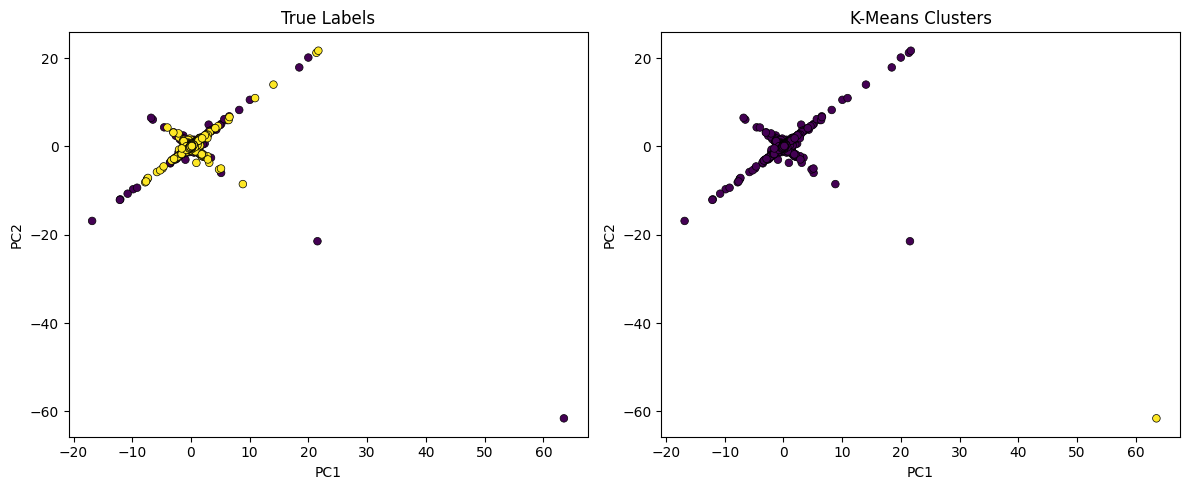

Cluster Centers:
Cluster 0: PC1 = -0.006, PC2 = 0.006
Cluster 1: PC1 = 63.494, PC2 = -61.603

Clustering Accuracy: 50.01%


In [39]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

# Plot the results
plt.figure(figsize=(12, 5))

# Plot 1: True labels
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Cy, cmap='viridis', s=30, edgecolors='k', linewidth=0.5)
plt.title("True Labels")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plot 2: K-means clusters
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=30, edgecolors='k', linewidth=0.5)
plt.title("K-Means Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()

# Print cluster centers
print("Cluster Centers:")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}: PC1 = {center[0]:.3f}, PC2 = {center[1]:.3f}")

# Calculate accuracy of clustering vs true labels
# Since cluster labels might be flipped (0/1 swapped), we check both mappings
accuracy_01 = np.mean(cluster_labels == Cy) * 100
accuracy_10 = np.mean(cluster_labels != Cy) * 100
accuracy = max(accuracy_01, accuracy_10)

print(f"\nClustering Accuracy: {accuracy:.2f}%")

# Agglomerative clustering

In [40]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import seaborn as sns


Text(0, 0.5, 'Feature 2')

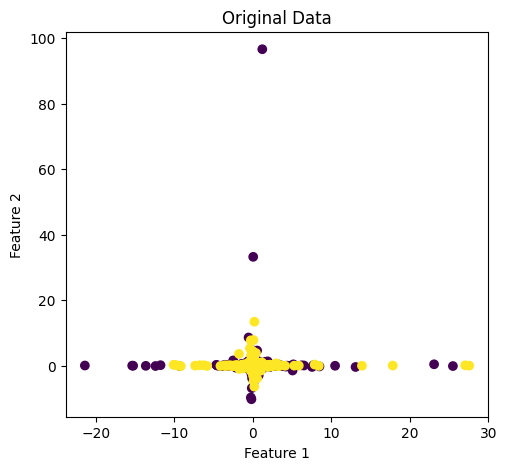

In [41]:
# Visualize the original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=Cy)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Silhouette Score (ward linkage): 0.994


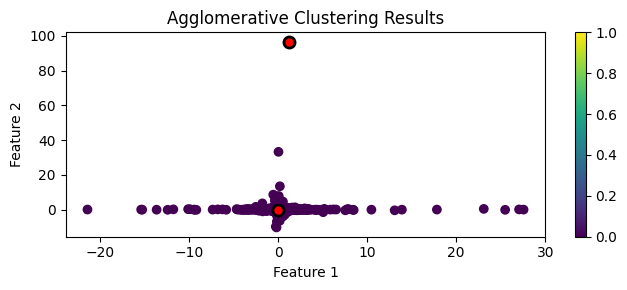

In [42]:


# Apply Agglomerative Clustering
# You can adjust parameters based on your needs:
# - n_clusters: Number of clusters to find
# - linkage: 'ward', 'complete', 'average', or 'single'
# - affinity: Distance metric ('euclidean', 'manhattan', etc.)

# Example 1: Basic agglomerative clustering with 3 clusters
agg_clustering = AgglomerativeClustering(
    n_clusters=2,           # Number of clusters
    linkage='single',         # Linkage criterion
    metric='euclidean'   # Distance metric (ignored for ward linkage)
)

# Fit the model and predict cluster labels
cluster_labels = agg_clustering.fit_predict(X)

# Calculate silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score (ward linkage): {silhouette_avg:.3f}")

# Visualize the clustering results
plt.subplot(1, 2, 2)
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter)

# Add cluster centers (computed as mean of points in each cluster)
unique_labels = np.unique(cluster_labels)
centers = []
for label in unique_labels:
    class_member_mask = (cluster_labels == label)
    center = X[class_member_mask].mean(axis=0)
    centers.append(center)
    plt.plot(center[0], center[1], 'ro', markersize=8, markerfacecolor='red',
             markeredgecolor='black', markeredgewidth=2)

plt.tight_layout()
plt.show()

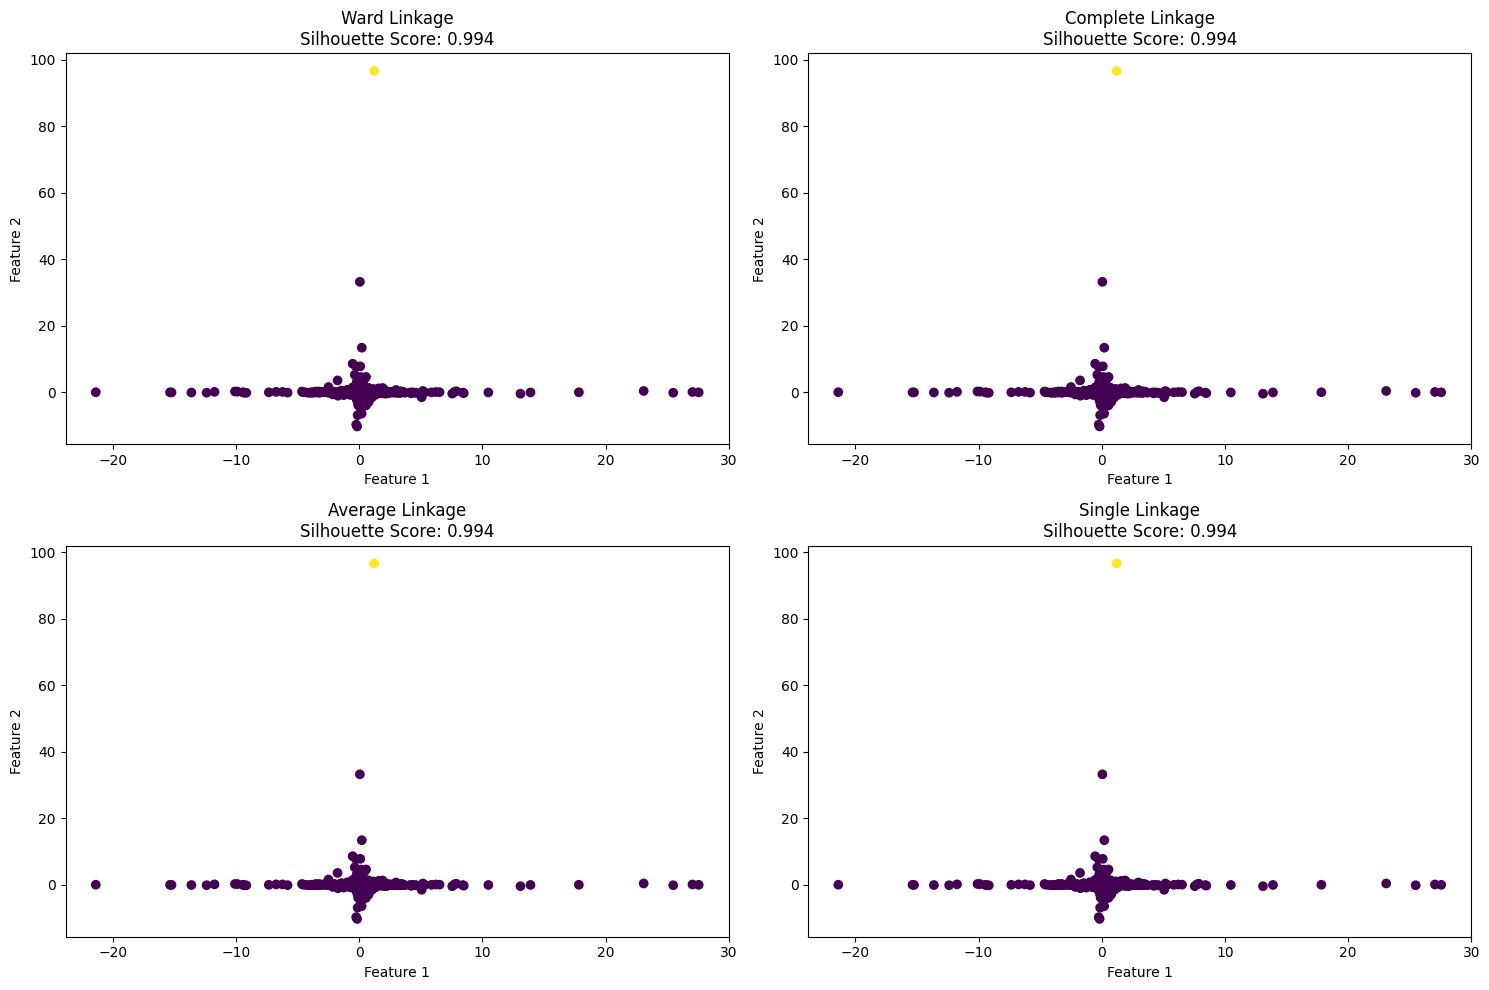

In [43]:
# Example 2: Try different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)

    # For single linkage, we can use other affinity metrics
    if method == 'single':
        agg_clustering = AgglomerativeClustering(
            n_clusters=2,
            linkage=method,
            metric='euclidean'
        )
    else:
        agg_clustering = AgglomerativeClustering(
            n_clusters=2,
            linkage=method,
            metric='euclidean'
        )

    labels = agg_clustering.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)

    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(f'{method.capitalize()} Linkage\nSilhouette Score: {silhouette_avg:.3f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


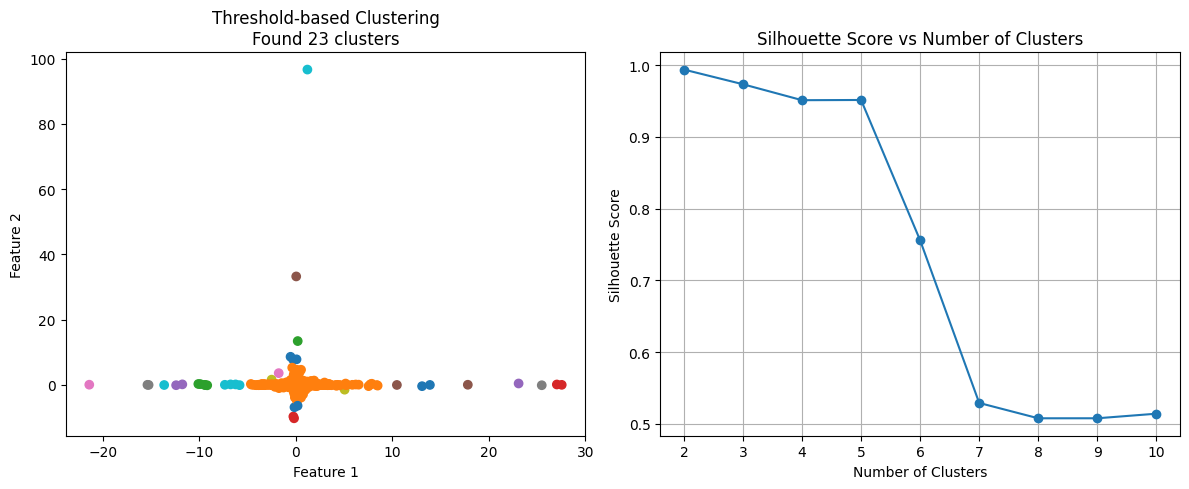


Best number of clusters: 2
Best silhouette score: 0.994


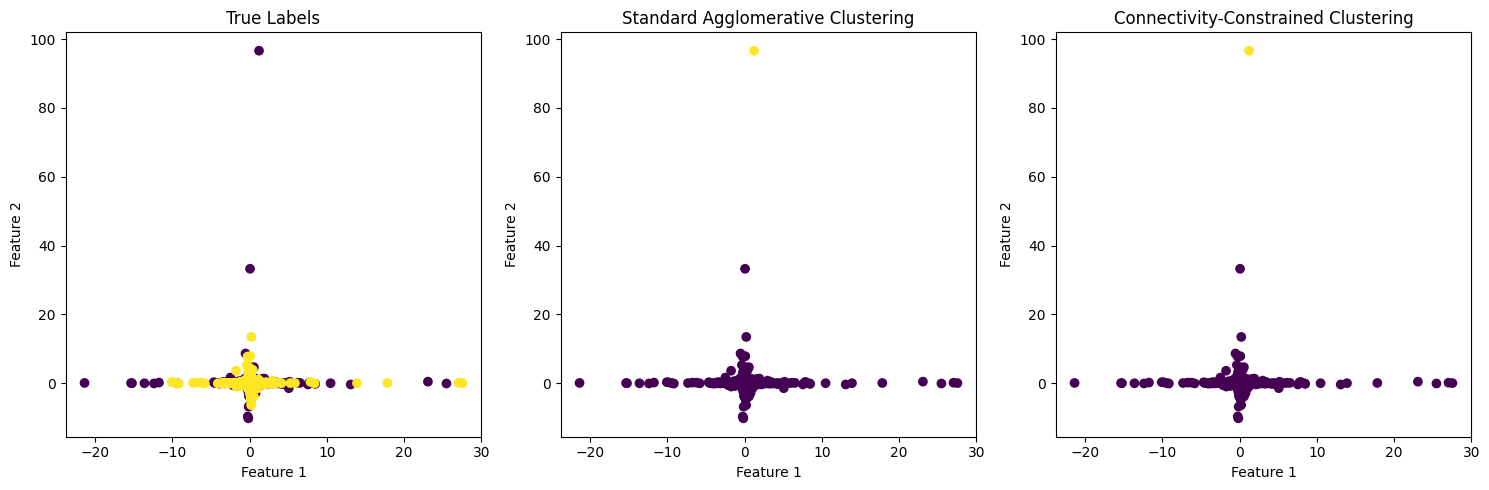

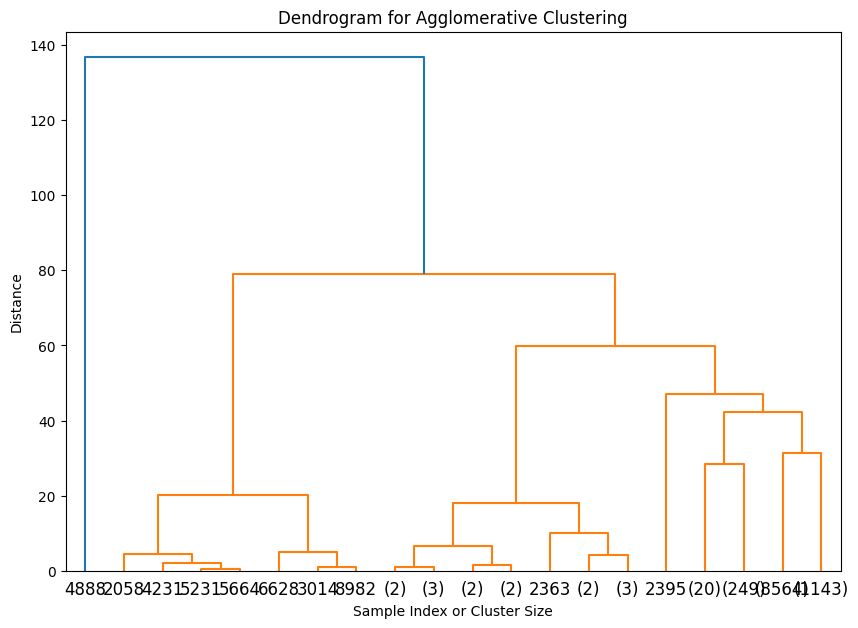

In [44]:

# Example 3: Agglomerative clustering without specifying number of clusters
# Using distance threshold to determine clusters
agg_clustering_threshold = AgglomerativeClustering(
    n_clusters=None,       # Must be None when using distance_threshold
    distance_threshold=1.0, # Linkage distance threshold
    linkage='single'
)

labels_threshold = agg_clustering_threshold.fit_predict(X)
n_clusters_found = len(np.unique(labels_threshold))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_threshold, cmap='tab10')
plt.title(f'Threshold-based Clustering\nFound {n_clusters_found} clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Example 4: Compare different numbers of clusters
n_cluster_range = range(2, 11)
silhouette_scores = []

for n in n_cluster_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels = agg_clustering.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.subplot(1, 2, 2)
plt.plot(n_cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print information about the best clustering result
best_n_clusters = n_cluster_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\nBest number of clusters: {best_n_clusters}")
print(f"Best silhouette score: {best_score:.3f}")

# Example 5: Using custom connectivity matrix (for structured data)
from sklearn.neighbors import kneighbors_graph

# Create connectivity matrix (connect each point to its 5 nearest neighbors)
connectivity_matrix = kneighbors_graph(X, n_neighbors=5, include_self=False)

# Apply clustering with connectivity constraint
agg_clustering_connectivity = AgglomerativeClustering(
    n_clusters=2,
    connectivity=connectivity_matrix,
    linkage='ward'
)

labels_connectivity = agg_clustering_connectivity.fit_predict(X)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=Cy, cmap='viridis')
plt.title('True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Standard Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels_connectivity, cmap='viridis')
plt.title('Connectivity-Constrained Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Example 6: Accessing the cluster hierarchy (linkage matrix)
# Note: Scikit-learn doesn't directly provide the linkage matrix
# But we can compute it using scipy if needed
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Compute linkage matrix using scipy
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()


# SVM

In [45]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Cy, test_size=0.2, random_state=42)

# Create an SVM classifier
# You can experiment with different kernels: 'linear', 'rbf', 'poly', 'sigmoid'
clf = svm.SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


# Visualize the decision boundary (for 2D data)
plt.figure(figsize=(10, 8))
# Plot the data points
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, s=30)
plt.colorbar(scatter)

# Create a mesh to plot the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Make predictions on the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points again (to ensure they're visible)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, s=30, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()

# Print support vectors information
print(f"\nNumber of support vectors: {len(clf.support_vectors_)}")
print(f"Support vectors per class: {clf.n_support_}")

Accuracy: 0.4970


In [ ]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## One-class SVM

In [ ]:
from sklearn.svm import OneClassSVM


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit OneClassSVM
# nu: parameter for controlling outlier fraction (0.1 means ~10% outliers)
# kernel: type of kernel ('rbf' is most common)
# gamma: kernel coefficient (higher values for more complex decision boundaries)
clf = OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
clf.fit(X_scaled)

# Predict anomalies (-1 for anomaly, 1 for normal)
predictions = clf.predict(X_scaled)
anomaly_scores = clf.decision_function(X_scaled)  # Distance from boundary

# Separate normal and anomalous points
normal_points = X[predictions == 1]
anomalous_points = X[predictions == -1]

print(f"Total points: {len(X)}")
print(f"Normal points detected: {len(normal_points)}")
print(f"Anomalies detected: {len(anomalous_points)}")
print(f"Percentage of anomalies: {len(anomalous_points)/len(X)*100:.2f}%")

# Visualize results
plt.figure(figsize=(12, 5))

# Plot 1: All data with anomaly predictions
plt.subplot(1, 2, 1)
plt.scatter(normal_points[:, 0], normal_points[:, 1],
           c='blue', marker='o', label='Normal', alpha=0.6)
plt.scatter(anomalous_points[:, 0], anomalous_points[:, 1],
           c='red', marker='^', label='Anomalies', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('OneClassSVM Anomaly Detection')
plt.legend()

# Plot 2: Decision function scores
plt.subplot(1, 2, 2)
plt.hist(anomaly_scores[predictions == 1], bins=50, alpha=0.7, label='Normal', color='blue')
plt.hist(anomaly_scores[predictions == -1], bins=50, alpha=0.7, label='Anomalies', color='red')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.legend()
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)  # Decision boundary

plt.tight_layout()
plt.show()

# Example of validating new data points
print("\nValidation examples:")
# New normal point
new_normal_point = np.array([[1.0, 1.0]])
new_normal_scaled = scaler.transform(new_normal_point)
prediction_normal = clf.predict(new_normal_scaled)
score_normal = clf.decision_function(new_normal_scaled)
print(f"Point {new_normal_point[0]}: Prediction = {prediction_normal[0]}, Score = {score_normal[0]:.3f}")

# New anomalous point
new_anomaly_point = np.array([[10.0, -5.0]])
new_anomaly_scaled = scaler.transform(new_anomaly_point)
prediction_anomaly = clf.predict(new_anomaly_scaled)
score_anomaly = clf.decision_function(new_anomaly_scaled)
print(f"Point {new_anomaly_point[0]}: Prediction = {prediction_anomaly[0]}, Score = {score_anomaly[0]:.3f}")

## SVМ with TSNE

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns


Tracking sample 1 with label: 0.0 (Class 0)
Tracking sample 0 with label: 1.0 (Class 1)
Applying t-SNE...
Accuracy with t-SNE + SVM: 0.8800


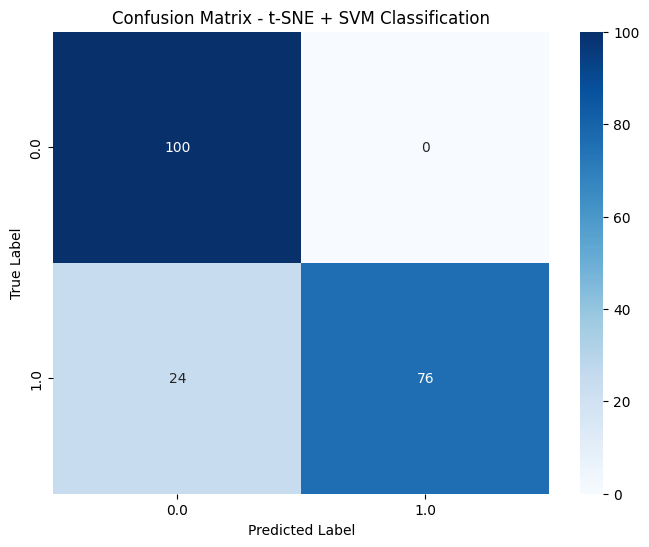


Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89       100
         1.0       1.00      0.76      0.86       100

    accuracy                           0.88       200
   macro avg       0.90      0.88      0.88       200
weighted avg       0.90      0.88      0.88       200



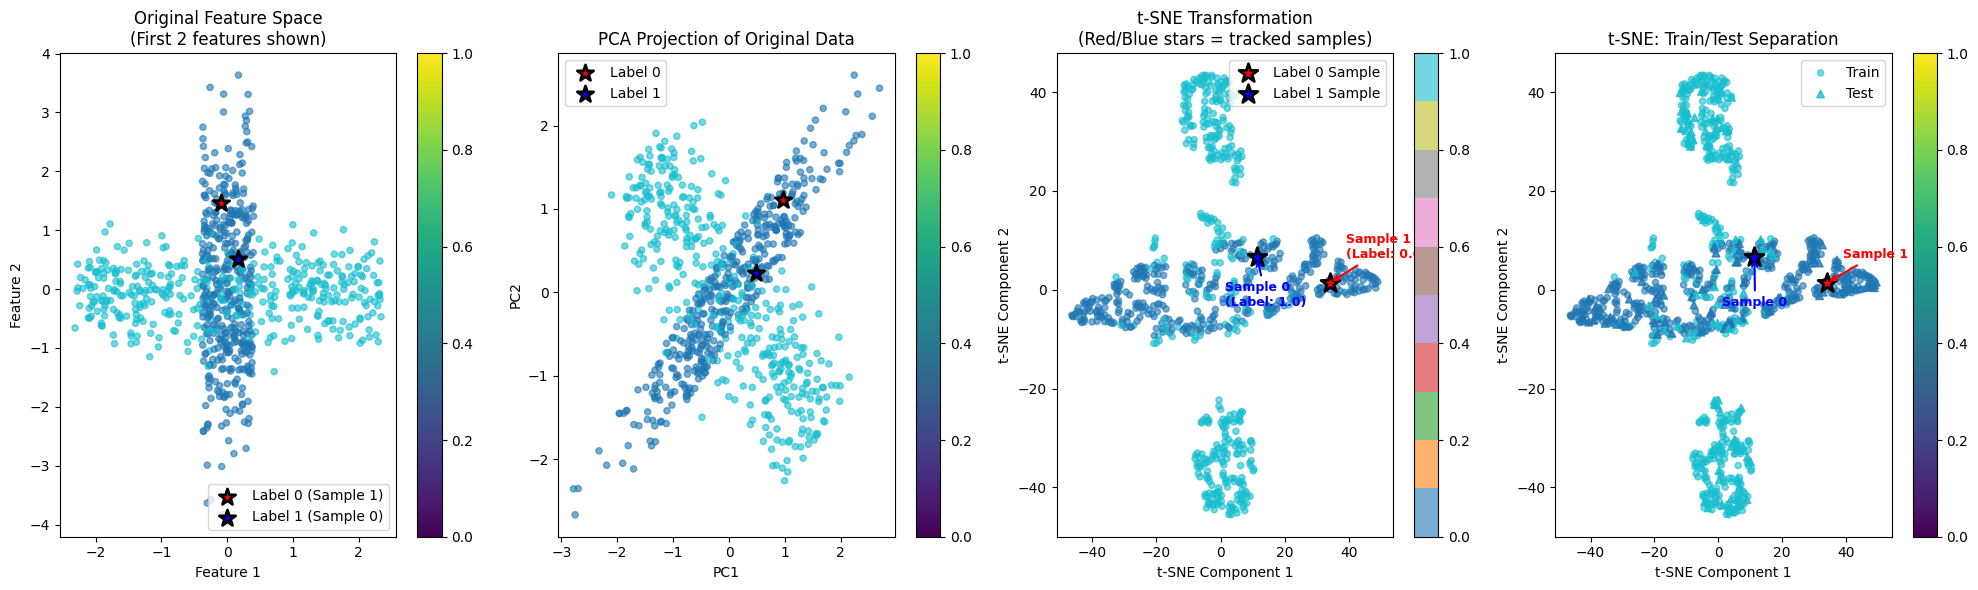

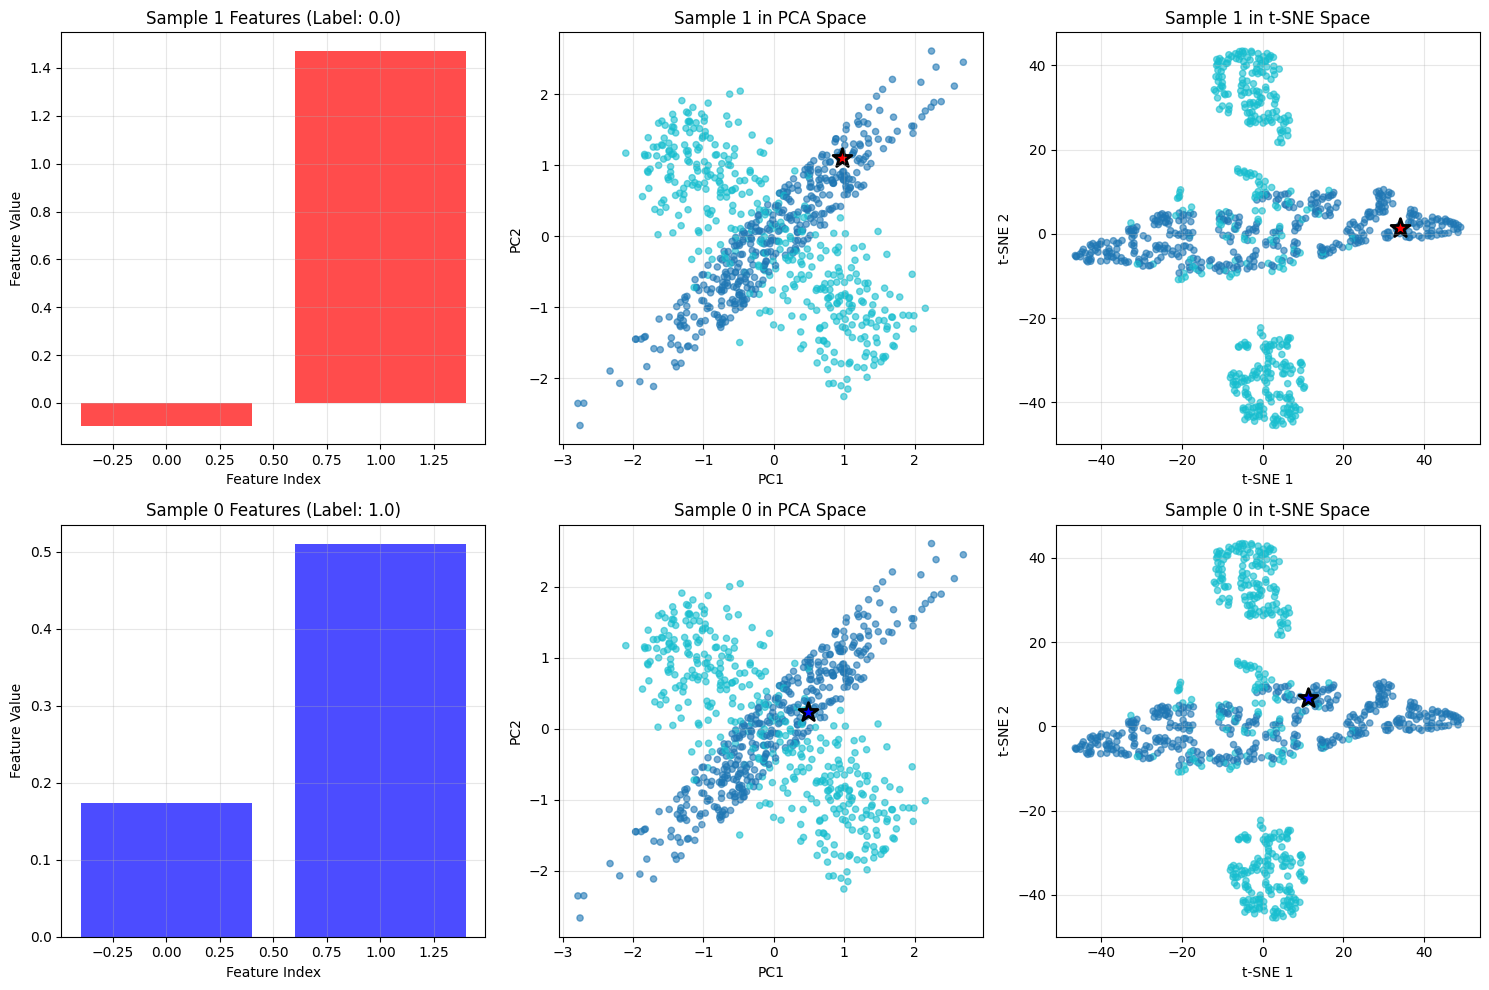


Sample Transformation Summary:
Sample 1 - Label: 0.0
  Predicted label: 0.0
  t-SNE coordinates: (34.04, 1.39)

Sample 0 - Label: 1.0
  Predicted label: 0.0
  t-SNE coordinates: (11.32, 6.72)


In [115]:

# Assuming X and Cy are already defined in your environment
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Cy, test_size=0.2, random_state=42, stratify=Cy)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select TWO specific samples to track - one from each class (0 and 1)
# Find indices of samples with label 0 and label 1 in test set
label_0_indices = np.where(y_test == 0)[0]
label_1_indices = np.where(y_test == 1)[0]

if len(label_0_indices) > 0 and len(label_1_indices) > 0:
    sample_0_index = label_0_indices[0]  # First sample with label 0
    sample_1_index = label_1_indices[0]  # First sample with label 1

    sample_0_original = X_test_scaled[sample_0_index].reshape(1, -1)
    sample_1_original = X_test_scaled[sample_1_index].reshape(1, -1)

    sample_0_label = y_test.iloc[sample_0_index] if hasattr(y_test, 'iloc') else y_test[sample_0_index]
    sample_1_label = y_test.iloc[sample_1_index] if hasattr(y_test, 'iloc') else y_test[sample_1_index]

    print(f"Tracking sample {sample_0_index} with label: {sample_0_label} (Class 0)")
    print(f"Tracking sample {sample_1_index} with label: {sample_1_label} (Class 1)")
else:
    print("Not enough samples from both classes, using first two test samples")
    sample_0_index, sample_1_index = 0, 1
    sample_0_original = X_test_scaled[sample_0_index].reshape(1, -1)
    sample_1_original = X_test_scaled[sample_1_index].reshape(1, -1)
    sample_0_label = y_test.iloc[sample_0_index] if hasattr(y_test, 'iloc') else y_test[sample_0_index]
    sample_1_label = y_test.iloc[sample_1_index] if hasattr(y_test, 'iloc') else y_test[sample_1_index]

# Apply t-SNE for dimensionality reduction (fit on training data)
print("Applying t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='pca')

# For better visualization, let's create a combined dataset approach
# Combine train and test for consistent t-SNE mapping
X_combined = np.vstack([X_train_scaled, X_test_scaled])
combined_labels = np.concatenate([y_train, y_test])
is_test = np.concatenate([np.zeros(len(X_train_scaled)), np.ones(len(X_test_scaled))])

# Apply t-SNE to combined data
X_combined_tsne = tsne.fit_transform(X_combined)

# Separate back into train and test
split_point = len(X_train_scaled)
X_train_tsne_final = X_combined_tsne[:split_point]
X_test_tsne_final = X_combined_tsne[split_point:]

# Get t-SNE coordinates for both samples
sample_0_tsne_coords = X_test_tsne_final[sample_0_index]
sample_1_tsne_coords = X_test_tsne_final[sample_1_index]

# Train a classifier on t-SNE reduced data
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train_tsne_final, y_train)

# Make predictions
y_pred = classifier.predict(X_test_tsne_final)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with t-SNE + SVM: {accuracy:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(Cy), yticklabels=np.unique(Cy))
plt.title('Confusion Matrix - t-SNE + SVM Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the transformation process with TWO samples
fig = plt.figure(figsize=(20, 6))

# Plot 1: Original samples in feature space (showing first 2 features)
plt.subplot(1, 4, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='tab10', alpha=0.6, s=20)
plt.scatter(sample_0_original[0, 0], sample_0_original[0, 1], c='red', s=150, marker='*', edgecolors='black', linewidth=2, label=f'Label 0 (Sample {sample_0_index})')
plt.scatter(sample_1_original[0, 0], sample_1_original[0, 1], c='blue', s=150, marker='*', edgecolors='black', linewidth=2, label=f'Label 1 (Sample {sample_1_index})')
plt.title('Original Feature Space\n(First 2 features shown)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar()

# Plot 2: Samples highlighted in original high-dimensional space (using PCA for 2D projection)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
sample_0_pca = pca.transform(sample_0_original)
sample_1_pca = pca.transform(sample_1_original)

plt.subplot(1, 4, 2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10', alpha=0.6, s=20)
plt.scatter(sample_0_pca[0, 0], sample_0_pca[0, 1], c='red', s=150, marker='*', edgecolors='black', linewidth=2, label=f'Label 0')
plt.scatter(sample_1_pca[0, 0], sample_1_pca[0, 1], c='blue', s=150, marker='*', edgecolors='black', linewidth=2, label=f'Label 1')
plt.title('PCA Projection of Original Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.colorbar()

# Plot 3: t-SNE transformation with BOTH tracked samples
plt.subplot(1, 4, 3)
scatter = plt.scatter(X_train_tsne_final[:, 0], X_train_tsne_final[:, 1], c=y_train, cmap='tab10', alpha=0.6, s=20)
plt.scatter(sample_0_tsne_coords[0], sample_0_tsne_coords[1], c='red', s=200, marker='*', edgecolors='black', linewidth=2, label=f'Label 0 Sample')
plt.scatter(sample_1_tsne_coords[0], sample_1_tsne_coords[1], c='blue', s=200, marker='*', edgecolors='black', linewidth=2, label=f'Label 1 Sample')

# Add annotations for both samples
plt.annotate(f'Sample {sample_0_index}\n(Label: {sample_0_label})',
             xy=(sample_0_tsne_coords[0], sample_0_tsne_coords[1]),
             xytext=(sample_0_tsne_coords[0]+5, sample_0_tsne_coords[1]+5),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=9, color='red', weight='bold')

plt.annotate(f'Sample {sample_1_index}\n(Label: {sample_1_label})',
             xy=(sample_1_tsne_coords[0], sample_1_tsne_coords[1]),
             xytext=(sample_1_tsne_coords[0]-10, sample_1_tsne_coords[1]-10),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=9, color='blue', weight='bold')

plt.title('t-SNE Transformation\n(Red/Blue stars = tracked samples)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.colorbar(scatter)

# Plot 4: t-SNE with train/test separation and BOTH samples
plt.subplot(1, 4, 4)
# Plot training data
plt.scatter(X_train_tsne_final[:, 0], X_train_tsne_final[:, 1], c=y_train, cmap='tab10', alpha=0.6, s=20, label='Train')
# Plot test data
plt.scatter(X_test_tsne_final[:, 0], X_test_tsne_final[:, 1], c=y_test, cmap='tab10', alpha=0.8, s=30, marker='^', label='Test')
# Highlight both tracked samples
plt.scatter(sample_0_tsne_coords[0], sample_0_tsne_coords[1], c='red', s=200, marker='*', edgecolors='black', linewidth=2)
plt.scatter(sample_1_tsne_coords[0], sample_1_tsne_coords[1], c='blue', s=200, marker='*', edgecolors='black', linewidth=2)

plt.annotate(f'Sample {sample_0_index}',
             xy=(sample_0_tsne_coords[0], sample_0_tsne_coords[1]),
             xytext=(sample_0_tsne_coords[0]+5, sample_0_tsne_coords[1]+5),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=9, color='red', weight='bold')

plt.annotate(f'Sample {sample_1_index}',
             xy=(sample_1_tsne_coords[0], sample_1_tsne_coords[1]),
             xytext=(sample_1_tsne_coords[0]-10, sample_1_tsne_coords[1]-10),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=9, color='blue', weight='bold')

plt.title('t-SNE: Train/Test Separation')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.colorbar()

plt.tight_layout()
plt.show()

# Additional visualization: Show both samples' journeys
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Sample 0 features
axes[0, 0].bar(range(min(10, len(sample_0_original[0]))), sample_0_original[0, :min(10, len(sample_0_original[0]))], color='red', alpha=0.7)
axes[0, 0].set_title(f'Sample {sample_0_index} Features (Label: {sample_0_label})')
axes[0, 0].set_xlabel('Feature Index')
axes[0, 0].set_ylabel('Feature Value')
axes[0, 0].grid(True, alpha=0.3)

# Sample 1 features
axes[1, 0].bar(range(min(10, len(sample_1_original[0]))), sample_1_original[0, :min(10, len(sample_1_original[0]))], color='blue', alpha=0.7)
axes[1, 0].set_title(f'Sample {sample_1_index} Features (Label: {sample_1_label})')
axes[1, 0].set_xlabel('Feature Index')
axes[1, 0].set_ylabel('Feature Value')
axes[1, 0].grid(True, alpha=0.3)

# PCA projections
axes[0, 1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10', alpha=0.6, s=20)
axes[0, 1].scatter(sample_0_pca[0, 0], sample_0_pca[0, 1], c='red', s=200, marker='*', edgecolors='black', linewidth=2)
axes[0, 1].set_title(f'Sample {sample_0_index} in PCA Space')
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10', alpha=0.6, s=20)
axes[1, 1].scatter(sample_1_pca[0, 0], sample_1_pca[0, 1], c='blue', s=200, marker='*', edgecolors='black', linewidth=2)
axes[1, 1].set_title(f'Sample {sample_1_index} in PCA Space')
axes[1, 1].set_xlabel('PC1')
axes[1, 1].set_ylabel('PC2')
axes[1, 1].grid(True, alpha=0.3)

# t-SNE projections
axes[0, 2].scatter(X_train_tsne_final[:, 0], X_train_tsne_final[:, 1], c=y_train, cmap='tab10', alpha=0.6, s=20)
axes[0, 2].scatter(sample_0_tsne_coords[0], sample_0_tsne_coords[1], c='red', s=200, marker='*', edgecolors='black', linewidth=2)
axes[0, 2].set_title(f'Sample {sample_0_index} in t-SNE Space')
axes[0, 2].set_xlabel('t-SNE 1')
axes[0, 2].set_ylabel('t-SNE 2')
axes[0, 2].grid(True, alpha=0.3)

axes[1, 2].scatter(X_train_tsne_final[:, 0], X_train_tsne_final[:, 1], c=y_train, cmap='tab10', alpha=0.6, s=20)
axes[1, 2].scatter(sample_1_tsne_coords[0], sample_1_tsne_coords[1], c='blue', s=200, marker='*', edgecolors='black', linewidth=2)
axes[1, 2].set_title(f'Sample {sample_1_index} in t-SNE Space')
axes[1, 2].set_xlabel('t-SNE 1')
axes[1, 2].set_ylabel('t-SNE 2')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nSample Transformation Summary:")
print(f"Sample {sample_0_index} - Label: {sample_0_label}")
print(f"  Predicted label: {y_pred[sample_0_index]}")
print(f"  t-SNE coordinates: ({sample_0_tsne_coords[0]:.2f}, {sample_0_tsne_coords[1]:.2f})")
print()
print(f"Sample {sample_1_index} - Label: {sample_1_label}")
print(f"  Predicted label: {y_pred[sample_1_index]}")
print(f"  t-SNE coordinates: ({sample_1_tsne_coords[0]:.2f}, {sample_1_tsne_coords[1]:.2f})")


In [113]:
# Compare with direct classification
print("\nComparison with direct SVM classification:")
direct_classifier = SVC(kernel='rbf', random_state=42)
direct_classifier.fit(X_train_scaled, y_train)
y_pred_direct = direct_classifier.predict(X_test_scaled)
direct_accuracy = accuracy_score(y_test, y_pred_direct)
print(f"Direct SVM Accuracy: {direct_accuracy:.4f}")
print(f"t-SNE + SVM Accuracy: {accuracy:.4f}")


Comparison with direct SVM classification:
Direct SVM Accuracy: 0.8750
t-SNE + SVM Accuracy: 0.8800
